In [5]:
# sample image
import torch

from dataset.utils import pNormalize
from dataset.datasets import sentinel, s2stats
from dataset.stats import quantiles

from model.models import UNET

from torchvision import transforms
from torch.utils.data import DataLoader
q_hi = torch.tensor([2102.0, 1716.0, 1398.0, 4732.0, 2434.42919921875, 3701.759765625, 4519.2177734375, 4857.7734375, 3799.80322265625, 3008.8935546875])
q_lo = torch.tensor([102.0, 159.0, 107.0, 77.0, 106.98081970214844, 79.00384521484375, 86.18966674804688, 70.40167236328125, 50.571197509765625, 36.95356750488281])
        
norm = pNormalize(
    maxPer=quantiles['high']['1'],
    minPer=quantiles['low']['1'],
    rgb = False,
    rgbsi= True
)


# Create experimental dataset and loader, rgb=True for 3 channels (default = False)
test_set = sentinel(root_dir='processed-data/dsen_2_256_new_split',data='test', img_transform=norm,rgbsi=True)
#test_set = s2stats(root_dir='processed-data/dsen_2_256_new_split/timeperiod1/test')
test_loader = DataLoader(test_set, batch_size=10, num_workers=0)

print(len(test_set))

# access one image from dataset
img, label = test_set[0]
#img, label, path = test_set[0]
print('image shape:', img.shape)



# or  batch from DataLoader
dataiter = iter(test_loader)
images, labels = dataiter.next()
#images, labels, path = dataiter.next()





# define model
model = UNET(in_channels=images.shape[1])
model.load_state_dict(torch.load('runs/WCE_FTL_100_epochs_all_bands_TP1_20220611_1516/saved_model_IOU/model_epoch_66.pt',map_location=torch.device('cpu')))
# disable gradients etc. model.train() for training https://medium.com/jun94-devpblog/pytorch-6-model-train-vs-model-eval-no-grad-hyperparameter-tuning-3812c216a3bd
model.eval()

output = model(images)

#pred = torch.argmax(output, dim=1)
     # prediction
pred= torch.nn.functional.softmax(output,dim=1)
pred = torch.argmax(pred,dim=1)


#print('prediction:', pred.shape)
#print('labels:', labels.shape)

print('output:',output.shape)
print('labl', labels.shape)
print('pred:',pred.shape)

306
image shape: torch.Size([5, 256, 256])
tensor(0.8407)


RuntimeError: Error(s) in loading state_dict for UNET:
	size mismatch for double_conv_downs.0.0.weight: copying a param with shape torch.Size([64, 10, 3, 3]) from checkpoint, the shape in current model is torch.Size([64, 5, 3, 3]).

In [11]:
te= torch.rand(5,2,2)
te[0:3,:,:].shape
te[3:5,:,:].shape

torch.eq(te,torch.cat((te[0:3],te[3:5]),dim=0))

tensor([[[True, True],
         [True, True]],

        [[True, True],
         [True, True]],

        [[True, True],
         [True, True]],

        [[True, True],
         [True, True]],

        [[True, True],
         [True, True]]])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


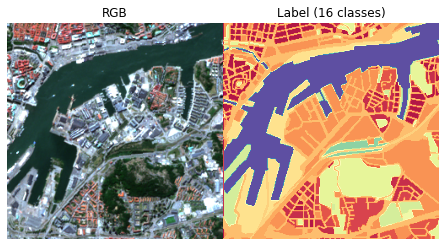

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_sample(labl,rgb,classMax=27,classMin=0,fig_scale=3,save_fig=True,path=None,fn='train_sample.png',dpi=300):
    
    corrPred=torch.eq(pred,labl)
    predratio = torch.sum(corrPred)/corrPred.numel()*100
    cmap = plt.get_cmap('Spectral', classMax - classMin + 1)

    nrow = 1
    ncol = 2
    
    gridspec_kw ={ 
                "wspace": 0.0,
                "hspace": 0.0, 
                "top": 1.-0.5/(fig_scale*nrow+1),
                "bottom": 0.5/(fig_scale*nrow+1), 
                "left": 0.5/(fig_scale*ncol+1), 
                "right": 1-0.5/(fig_scale*ncol+1)
                }
    
    fig_kw={
        "figsize": (fig_scale*ncol+1,fig_scale*nrow+1)
        }

    fig, axs =plt.subplots(nrow,ncol,gridspec_kw=gridspec_kw , **fig_kw)

    # Adds a subplot at the 1st column
    axs[0].imshow(rgb.permute(1,2,0).cpu().numpy())
    axs[0].axis('off')
    axs[0].set_title('RGB')
    axs[0].set_xticklabels([])
    axs[0].set_yticklabels([])

    # Adds a subplot at the 2nd column
    map=axs[1].imshow(labl.cpu().numpy(),cmap=cmap,vmin=(classMin-0.5),vmax=(classMax+0.5))          
    axs[1].axis('off')
    axs[1].set_title("Label (%d classes)"%(len(torch.unique(labl))))
    axs[1].set_xticklabels([])
    axs[1].set_yticklabels([])


    #fig.colorbar(map, ax=axs, cmap=cmap, ticks=np.arange(classMin,classMax + 1),shrink=0.6,location='bottom')

    if save_fig:
        if path:
            
            if not os.path.exists(path):
                os.makedirs(path)

            path= os.path.join(path,fn)
        else:
            path= fn

        plt.savefig(path,dpi=dpi)
    else:
        plt.show()
        
plot_sample(labels[0,:,:],images[0,0:3,:,:])

In [18]:
import glob

len(glob.glob('processed-data/dsen_2_256_new/*/*/*/*.nc'))/2

3203.0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

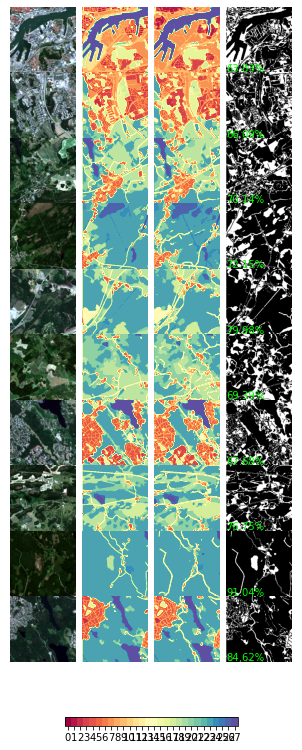

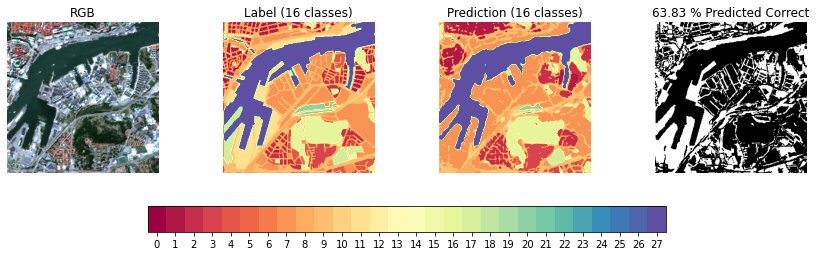

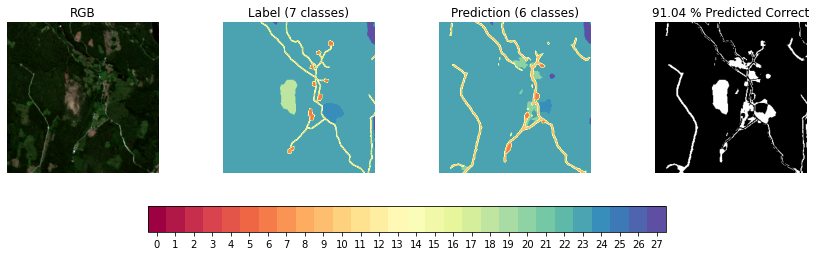

In [2]:
## test plot_sample and plot_batch

from train.utils import get_min_max_pred,plots
from train.metrics import plot_sample, plot_batch

for idx,(images,labels) in enumerate(test_loader):
#for idx,(images,labels,path) in enumerate(test_loader):
#dataiter = iter(test_loader)
#images, labels = dataiter.next()
    with torch.no_grad():
        output = model(images)
        preds= torch.nn.functional.softmax(output,dim=1)
        preds = torch.argmax(preds,dim=1)
        plots(preds,labels,images,savedir='test2',idx=idx)
  
        break
        #for i in range(pred.shape[0]):
            #fn= path[i].split('/')[-1]+'.png'
            #plot_sample(pred[i,:,:],labels[i,:,:], images[i,0:3,:,:] ,path='tests',fn= fn)
           
            #plot_pred_lbl_rgb(pred[i,:,:],labels[i,:,:], images[i,0:3,:,:]  )
        #if idx==0:
        #    break

tensor([63.8306, 66.0904, 70.1370, 72.1497, 79.9805, 69.3924, 67.6849, 76.7532,
        91.0370, 84.6191])


In [ ]:
# run this to make sure tensorboard is working
#!conda list | grep tensorboard
import torch
#!conda install tensorboard -y
from torch.utils.tensorboard import SummaryWriter
print(torch.__version__)

#make sure this executes
SummaryWriter()

In [ ]:
#visualise images in tensorboard
from torchvision.utils import make_grid
from datetime import datetime

dataiter = iter(test_loader)
images, labels = dataiter.next()

# Create a grid from the images and show them
# https://pytorch.org/vision/main/auto_examples/plot_visualization_utils.html#sphx-glr-auto-examples-plot-visualization-utils-py
img_grid = make_grid(images)
#show(img_grid)
#matplotlib_imshow(img_grid, one_channel=False)
#print('  '.join(classes[labels[j]] for j in range(4))
# Default log_dir argument is "runs" - but it's good to be specific
# torch.utils.tensorboard.SummaryWriter is imported above
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
writer = SummaryWriter('runs/visualise_data')

# Write image data to TensorBoard log dir
writer.add_image('Sat Images', img_grid)
writer.flush()

# To view, start TensorBoard on the command line with:
#  tensorboard --logdir=runs
# ...and open a browser tab to http://localhost:6006/

#if on remote
## on remote
##tensorboard --logdir <path> --port 6006
## forward everything on port 6006 on server to 
##ssh -L 16006:127.0.0.1:6006 -i vmexjobb_key.pem exjobbare@vdexjobb.westeurope.cloudapp.azure.com

In [ ]:
#visualizing model in tensorboard

# Again, grab a single mini-batch of images
dataiter = iter(test_loader)
images, labels = dataiter.next()

# add_graph() will trace the sample input through your model,
# and render it as a graph.
writer.add_graph(model, images)
writer.flush()